In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/colab/dataset

/content/drive/MyDrive/colab/dataset


In [5]:
import numpy as np
import pandas as pd

## Pima indians diabetes

In [6]:
diabetes = pd.read_csv('pima-indians-diabetes.csv', header = None)
diabetes

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.iloc[:, :-1].values, diabetes.iloc[:, -1].values,
    stratify = diabetes.iloc[:, -1].values, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [8]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
                    Dense(12, input_dim = 8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 50,
    verbose = 0
)

In [14]:
answer = model.evaluate(X_test, y_test)
print(f'accuracy : {answer[1]:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7448
accuracy : 0.7448


#### 30/1, epochs = 100, rmsprop

In [15]:
model2 = Sequential()
model2.add(Dense(30, input_dim= 8, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [17]:
history2 = model2.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 100,
    batch_size = 50,
    verbose = 1
)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 43.5360 - accuracy: 0.3326 - val_loss: 30.3869 - val_accuracy: 0.4138
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 30.3665 - accuracy: 0.3348 - val_loss: 20.9488 - val_accuracy: 0.4138
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 19.7486 - accuracy: 0.3413 - val_loss: 11.9332 - val_accuracy: 0.4310
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 10.1816 - accuracy: 0.3783 - val_loss: 5.0479 - val_accuracy: 0.5086
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3.9305 - accuracy: 0.5413 - val_loss: 2.6984 - val_accuracy: 0.5603
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.3396 - accuracy: 0.5739 - val_loss: 2.4000 - val_accuracy: 0.5517
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 2.1098 - accuracy: 0.5783 - val_loss: 2.3204 - val_accuracy: 0.5000
Epoch

In [18]:
answer2 = model2.evaluate(X_test, y_test)
print(f'accuracy : {answer2[1]:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.7539 - accuracy: 0.6927
accuracy : 0.6927


#### 24/12/8/1 layers, epochs = 200

In [19]:
model3 = Sequential()
model3.add(Dense(24, input_dim = 8, activation = 'relu'))
model3.add(Dense(12, activation = 'relu'))
model3.add(Dense(8, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [20]:
model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [21]:
history3 = model3.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 200,
    batch_size = 50,
    verbose = 2
)

Epoch 1/200
10/10 - 1s - loss: 10.5444 - accuracy: 0.3326 - val_loss: 6.8493 - val_accuracy: 0.4138
Epoch 2/200
10/10 - 0s - loss: 6.6367 - accuracy: 0.3348 - val_loss: 3.7411 - val_accuracy: 0.4224
Epoch 3/200
10/10 - 0s - loss: 3.2617 - accuracy: 0.3457 - val_loss: 1.6477 - val_accuracy: 0.4224
Epoch 4/200
10/10 - 0s - loss: 1.5858 - accuracy: 0.4087 - val_loss: 1.1279 - val_accuracy: 0.4569
Epoch 5/200
10/10 - 0s - loss: 1.0471 - accuracy: 0.5435 - val_loss: 0.9885 - val_accuracy: 0.5603
Epoch 6/200
10/10 - 0s - loss: 0.8512 - accuracy: 0.6348 - val_loss: 0.7958 - val_accuracy: 0.5345
Epoch 7/200
10/10 - 0s - loss: 0.7630 - accuracy: 0.6152 - val_loss: 0.7620 - val_accuracy: 0.5259
Epoch 8/200
10/10 - 0s - loss: 0.7297 - accuracy: 0.6174 - val_loss: 0.7272 - val_accuracy: 0.5690
Epoch 9/200
10/10 - 0s - loss: 0.7092 - accuracy: 0.6217 - val_loss: 0.7099 - val_accuracy: 0.5948
Epoch 10/200
10/10 - 0s - loss: 0.6967 - accuracy: 0.6457 - val_loss: 0.7150 - val_accuracy: 0.5776
Epoch 11

In [22]:
answer3 = model3.evaluate(X_test, y_test)
print(f'accuracy : {answer3[1]:.4f}')

6/6 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7448
accuracy : 0.7448


### MinMaxScaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(diabetes.iloc[:, :-1].values)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, diabetes.iloc[:, -1].values, 
    stratify = diabetes.iloc[:, -1].values, random_state = seed
)

In [35]:
model4 = Sequential()
model4.add(Dense(12, input_dim = 8, activation = 'relu'))
model4.add(Dense(8, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [36]:
model4.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [37]:
history4 = model4.fit(
    X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 50, verbose = 2
)

Epoch 1/200
10/10 - 0s - loss: 0.6795 - accuracy: 0.6348 - val_loss: 0.6800 - val_accuracy: 0.6466
Epoch 2/200
10/10 - 0s - loss: 0.6735 - accuracy: 0.6630 - val_loss: 0.6785 - val_accuracy: 0.5948
Epoch 3/200
10/10 - 0s - loss: 0.6676 - accuracy: 0.6652 - val_loss: 0.6775 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6631 - accuracy: 0.6652 - val_loss: 0.6768 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6582 - accuracy: 0.6652 - val_loss: 0.6762 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6549 - accuracy: 0.6652 - val_loss: 0.6756 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6515 - accuracy: 0.6652 - val_loss: 0.6744 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6491 - accuracy: 0.6652 - val_loss: 0.6743 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6457 - accuracy: 0.6652 - val_loss: 0.6724 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6428 - accuracy: 0.6652 - val_loss: 0.6698 - val_accuracy: 0.5862
Epoch 11/

In [38]:
model4.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7865


[0.4530090093612671, 0.7864583134651184]

### Visualization

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

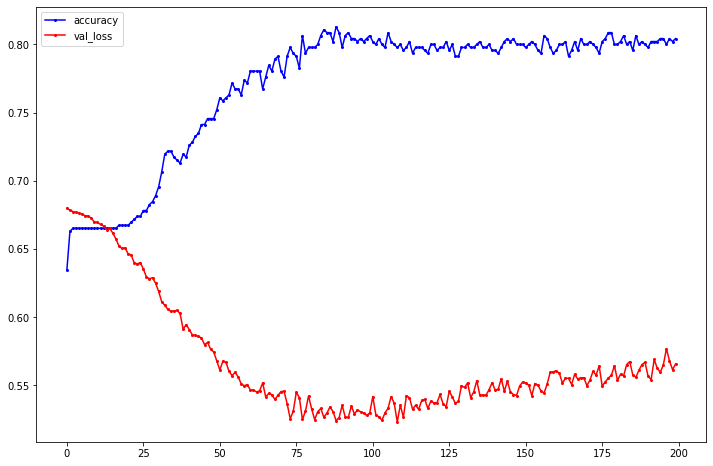

In [40]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.legend()
plt.show()